## Loops & Dictionaries (10 minutes)
Create a nested dictionary of recipes, with keys at the top level and dictionaries as their associated values.

1. Create an empty dictionary named `recipes`.
1. Add three dishes as the **keys** of your dictionary (e.g. 'meat pie')
1. For each key, the **value** should be another dictionary consisting of `ingredient: amount` pairs. (eg `'sugar': 'two cups'`) Each dish should have three ingredients.
1. Write a function to process the recipe dictionary. This function should loop through the recipes and return a single list of all ingredients for all recipes.

In [2]:
#1. Create an empty dictionary named recipes
recipes = {} 

In [9]:
#2. Add three dishes as the **keys** of your dictionary (e.g. 'meat pie')
dishes = ['meat pie', 'fried rice','sushi']

In [10]:
#3. Add ingredients to each dish 
dish_ingredients = [{'meat': '2 lb', 'salt':'3 tsp', 'onion':'1 head'},
                    {'rice': '1 cup', 'salt':'1 tsp', 'egg': '2'},
                    {'rice':'1 cup', 'seaweed':'4 sheets', 'cucumber': '1'}]

recipes = dict(zip(dishes, dish_ingredients))

In [11]:
recipes

{'meat pie': {'meat': '2 lb', 'salt': '3 tsp', 'onion': '1 head'},
 'fried rice': {'rice': '1 cup', 'salt': '1 tsp', 'egg': '2'},
 'sushi': {'rice': '1 cup', 'seaweed': '4 sheets', 'cucumber': '1'}}

In [14]:
# loop through the recipes
# return a single list of all ingredients for all recipes
ingredient_list = []
for ingredient in recipes.values():
    lst =  list(ingredient.keys())
    ingredient_list.extend(lst)    

In [16]:
# unique ingredients in the recipes
unique_ingredients = set(ingredient_list)

{'cucumber', 'egg', 'meat', 'onion', 'rice', 'salt', 'seaweed'}

## Coding Readibility (5 Minutes)
Rewrite the code below in using best practices:
```python
def blabla():
for i in range ( 10 ):for j in range( 10 ):for k in range(10): print( i,j,k ) return everything
```

In [17]:
def blabla():
    for i in range (10):
        for j in range(10):
            for k in range(10): 
                print( i,j,k ) 
    return everything

## Data cleaning (15 Minutes)
read data from http://rattle.togaware.com/weatherAUS.csv
1. Add a `day`, `month`, and `year` column (three new columns)
1. Print out the name of the columns where there are missing values
1. Drop all columns except `day`, `month`, `year`, `Rainfall`, and `Sunshine`
1. Fill all missing `Rainfall` values as follows:
  1. If `Sunshine` is over 7.0, set `Rainfall` = 0
  2. Else (including if `Sunshine is NaN`) set `Rainfall` to the mean `Rainfall` value.

In [27]:
# import 
import pandas as pd

In [28]:
# load data
url = 'http://rattle.togaware.com/weatherAUS.csv'
weather = pd.read_csv(url)

In [29]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [31]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157344 entries, 0 to 157343
Data columns (total 24 columns):
Date             157344 non-null object
Location         157344 non-null object
MinTemp          155543 non-null float64
MaxTemp          155751 non-null float64
Rainfall         153737 non-null float64
Evaporation      84613 non-null float64
Sunshine         77779 non-null float64
WindGustDir      145694 non-null object
WindGustSpeed    145758 non-null float64
WindDir9am       145556 non-null object
WindDir3pm       151978 non-null object
WindSpeed9am     154950 non-null float64
WindSpeed3pm     153161 non-null float64
Humidity9am      154470 non-null float64
Humidity3pm      152088 non-null float64
Pressure9am      140480 non-null float64
Pressure3pm      140482 non-null float64
Cloud9am         94304 non-null float64
Cloud3pm         90188 non-null float64
Temp9am          155373 non-null float64
Temp3pm          153006 non-null float64
RainToday        153737 non-null obje

-  Add a day, month, and year column (three new columns)

In [32]:
#1. change Date column data type to timestamp
weather['Date'] = pd.to_datetime(weather['Date'])

In [38]:
#2. add day, month, and year columns 
weather['day']= weather['Date'].dt.day
weather['month']= weather['Date'].dt.month
weather['year']= weather['Date'].dt.year

- Print out the name of the columns where there are missing values

In [43]:
# columns with missing values
cols_with_nan = weather.columns[weather.isnull().sum()!=0].tolist()
cols_with_nan

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [47]:
# Drop all columns except day, month, year, Rainfall, and Sunshine
col_drop = [col for col in weather.columns 
            if col not in ['day','month','year','Rainfall','Sunshine']]
weather.drop(columns = col_drop, inplace=True)

In [48]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157344 entries, 0 to 157343
Data columns (total 5 columns):
Rainfall    153737 non-null float64
Sunshine    77779 non-null float64
day         157344 non-null int64
month       157344 non-null int64
year        157344 non-null int64
dtypes: float64(2), int64(3)
memory usage: 6.0 MB


- Fill all missing Rainfall values as follows:
    - If Sunshine is over 7.0, set Rainfall = 0
    - Else (including if Sunshine is NaN) set Rainfall to the mean Rainfall value.

In [49]:
# If Sunshine is over 7.0, set Rainfall = 0
mask = weather['Sunshine']>7
weather.loc[mask,'Rainfall']=0

In [57]:
# Else (including if Sunshine is NaN) set Rainfall to the mean Rainfall value.
## 1. retrive mean value
rainfall_mean = weather['Rainfall'].mean() # 1.9606329212347
rainfall_mean

1.96063292123474

In [58]:
## 2. set Else (including if Sunshine is NaN) to mean value 
mask2 = ~mask
weather.loc[mask2, 'Rainfall'] = rainfall_mean

In [59]:
# check 'Rainfall'
weather['Rainfall'].value_counts(dropna=False).head(10)

1.960633    109473
0.000000     47871
Name: Rainfall, dtype: int64

## Visualization (15 Minutes)

As best you can, recreate this bar chart created in Google Sheets using Python.  You may use Matplotlib, Seaborn, or any other graphing library you came across.
<img src="chart.jpg" alt="chart to recreate" width="500"/>

In [63]:
# creat dataset
category_dict = {'Category':['A','B','C','D','E'], 'Count':[54,23,99,37,3]}
category = pd.DataFrame.from_dict(category_dict)

In [64]:
category

,Category,Count
0,A,54
1,B,23
2,C,99
3,D,37
4,E,3


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

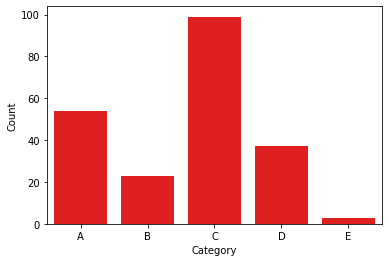

In [71]:
sns.barplot(x='Category',y='Count', data=category, color = 'r')

## Github (5 Minutes)

Follow the instructions at https://github.com/enkeboll/fis-dc-ds-060319-gifs, and make sure to check your email to confirm your collaborator status!

# Assessment submission (2 Minutes)
Please save this file as `firstname.ipynb` and upload it using [this form](https://docs.google.com/forms/d/e/1FAIpQLSdlnMgc5Nb5uFTmw7DiScapevg-VA8DQdiFeIAil5sZqYZbFA/viewform)